### A linear Poisson equation
$\nabla^2 u = sin(\pi x) sin(\pi y)$ \
$0 \leq x \leq 1$ \
$0 \leq y \leq 1$

In [43]:
import torch
import matplotlib.pyplot as plt

### Problem specific functions / variables

In [73]:
# partial differential equation
def f(u):
    out = torch.sin(torch.tensor(math.pi)*u[0]) * torch.sin(torch.tensor(math.pi)*u[1])
    return out, []

# boundary conditions
def g(u):
    return 0, 0

# Quadrature

xs = torch.linspace(0, 1, steps=10)
ys = torch.linspace(0, 1, steps=10)
x,y = torch.meshgrid(xs, ys)
w = torch.cat((torch.reshape(x, (1,-1)), torch.reshape(y,(1,-1))), 0).T

dw = []
for xy in w: # parallelize this
    if xy[0] == 0 or xy[1] == 0 or xy[0] == 1 or xy[1] == 1:
        dw.append(xy)
dw = torch.stack(dw)

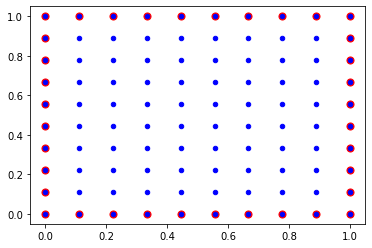

In [74]:
plt.scatter(dw[:,0],dw[:,1], c = 'r', s = 50)
plt.scatter(w[:,0],w[:,1], c = 'b', s = 20)
plt.show()
# add proper pyplot defualts

### Loss function

In [ ]:
def h():
    pass

### Training loop

In [ ]:
#define the loss fn and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#initialize empty list to track batch losses
batch_losses = []

#train the neural network for 5 epochs
for epoch in range(5):

    #reset iterator
    dataiter = iter(dataloader)
    
    for batch in dataiter:
                
        #reset gradients
        optimizer.zero_grad()
        
        #forward propagation through the network
        out = model(batch["..."])
        
        #calculate the loss
        loss = criterion(out, batch["..."])
        
        #track batch loss
        batch_losses.append(loss.item())
        
        #backpropagation
        loss.backward()
        
        #update the parameters
        optimizer.step()